In [40]:
import time
import logging
import numpy as np
import pandas as pd
from binance.lib.utils import config_logging
from binance.websocket.um_futures.websocket_client import UMFuturesWebsocketClient
from binance.um_futures import UMFutures
from binance.error import ClientError

import matplotlib.pyplot as plt
import seaborn as sns

from cert import binanceKey
from cert import test_binanceKey
from cert.myfuncs import *


# import API KEY and SECRET KEY
## realnet (base_url is realnet default)
API_KEY = binanceKey.API_KEY
SECRET_KEY = binanceKey.SECRET_KEY
## testnet
key = test_binanceKey.API_KEY
secret = test_binanceKey.SECRET_KEY
## testnet base_urls (for test trading, stream_url = futures_websocket_testnet and base_url = futures_testnet)
futures_testnet = test_binanceKey.futures_testnet
futures_websocket_testnet = test_binanceKey.futures_websocket_testnet
# END


# defining futures client
um_futures_client = UMFutures(key=key, secret=secret, base_url=futures_testnet) # testnet
my_client = UMFuturesWebsocketClient(stream_url=futures_websocket_testnet) # testnet
# END

In [43]:
resp = um_futures_client.depth("BTCUSDT", limit=1000)

In [47]:
ms2dt(1675615565670)

datetime.datetime(2023, 2, 6, 1, 46, 5)

In [2]:
from trade_rules.prelim import Prelim
predata = Prelim(um_futures_client)

In [34]:
# now = datetime.now()
# nowMin = now.year, now.month, now.day, now.hour, now.minute-1
# endTime = dt2ms(*nowMin)
# startTime = endTime - 1500*60*1000
startTime = 1663100760000 - 90000000
endTime = 1663100760000

startTimeList = [startTime]
endTimeList = [endTime]

for i in range(45):
    # print("i=", i)
    et = endTime - (i+1)*1500*60*1000
    st = startTime - (i+1)*1500*60*1000
    endTimeList.append(et)
    startTimeList.append(st)

startTimes = startTimeList[::-1]
endTimes = endTimeList[::-1]

backdata5 = pd.DataFrame()

for st, et in zip(startTimes, endTimes):
    df = predata.getData_OHLCV("1m", st, et)
    if len(df)!=1500:
        break
    time.sleep(1)
    print("time sleeped.")
    backdata5 = pd.concat([backdata5, df], axis=0)
    backdata5.reset_index(drop=True, inplace=True)

time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.
time sleeped.


In [38]:
backdata5

,stream,eventType,eventTime,startTime,closeTime,interval,open,high,low,close,volume
0,kline1m,kline,1675612799283,1658960760000,1658960819999,1m,22807.4,22815.9,22800.6,22815.9,14.829
1,kline1m,kline,1675612799283,1658960820000,1658960879999,1m,22807.3,23278.0,22805.0,22824.3,49.001
2,kline1m,kline,1675612799283,1658960880000,1658960939999,1m,22824.0,23278.0,22811.2,22811.2,159.721
3,kline1m,kline,1675612799283,1658960940000,1658960999999,1m,22820.4,23278.0,22820.4,22836.3,115.285
4,kline1m,kline,1675612799283,1658961000000,1658961059999,1m,22836.3,22848.1,22822.6,22822.6,78.415
...,...,...,...,...,...,...,...,...,...,...,...
68995,kline1m,kline,1675612863376,1663100460000,1663100519999,1m,21259.8,21400.0,21030.0,21031.4,54.698
68996,kline1m,kline,1675612863376,1663100520000,1663100579999,1m,21186.8,21400.0,21030.0,21259.8,68.536
68997,kline1m,kline,1675612863376,1663100580000,1663100639999,1m,21271.9,21400.0,21030.0,21030.0,15.057
68998,kline1m,kline,1675612863376,1663100640000,1663100699999,1m,21259.8,21400.0,21030.0,21259.8,114.028


In [36]:
backdata4

,stream,eventType,eventTime,startTime,closeTime,interval,open,high,low,close,volume
0,kline1m,kline,1675612588397,1663100760000,1663100819999,1m,21357.2,21400.0,21033.0,21033.0,4.834
1,kline1m,kline,1675612588397,1663100820000,1663100879999,1m,21179.8,21400.0,21030.0,21259.8,61.231
2,kline1m,kline,1675612588397,1663100880000,1663100939999,1m,21270.0,21400.0,21030.0,21399.8,18.485
3,kline1m,kline,1675612588397,1663100940000,1663100999999,1m,21399.8,21400.0,21030.0,21030.0,56.499
4,kline1m,kline,1675612588397,1663101000000,1663101059999,1m,21055.0,21415.0,21030.0,21259.8,303.931
...,...,...,...,...,...,...,...,...,...,...,...
46495,kline1m,kline,1675612631115,1665890460000,1665890519999,1m,19378.5,19378.8,19170.0,19170.0,36.591
46496,kline1m,kline,1675612631115,1665890520000,1665890579999,1m,19355.6,19355.6,19170.1,19170.1,12.389
46497,kline1m,kline,1675612631115,1665890580000,1665890639999,1m,19349.8,19350.0,19349.8,19350.0,4.780
46498,kline1m,kline,1675612631115,1665890640000,1665890699999,1m,19175.2,19355.6,19175.0,19175.0,56.436


In [31]:
backdata4.to_pickle('backdata0000.pkl')

In [32]:
backdata4

,stream,eventType,eventTime,startTime,closeTime,interval,open,high,low,close,volume
0,kline1m,kline,1675612588397,1663100760000,1663100819999,1m,21357.2,21400.0,21033.0,21033.0,4.834
1,kline1m,kline,1675612588397,1663100820000,1663100879999,1m,21179.8,21400.0,21030.0,21259.8,61.231
2,kline1m,kline,1675612588397,1663100880000,1663100939999,1m,21270.0,21400.0,21030.0,21399.8,18.485
3,kline1m,kline,1675612588397,1663100940000,1663100999999,1m,21399.8,21400.0,21030.0,21030.0,56.499
4,kline1m,kline,1675612588397,1663101000000,1663101059999,1m,21055.0,21415.0,21030.0,21259.8,303.931
...,...,...,...,...,...,...,...,...,...,...,...
46495,kline1m,kline,1675612631115,1665890460000,1665890519999,1m,19378.5,19378.8,19170.0,19170.0,36.591
46496,kline1m,kline,1675612631115,1665890520000,1665890579999,1m,19355.6,19355.6,19170.1,19170.1,12.389
46497,kline1m,kline,1675612631115,1665890580000,1665890639999,1m,19349.8,19350.0,19349.8,19350.0,4.780
46498,kline1m,kline,1675612631115,1665890640000,1665890699999,1m,19175.2,19355.6,19175.0,19175.0,56.436


In [33]:
backdata3

,stream,eventType,eventTime,startTime,closeTime,interval,open,high,low,close,volume
0,kline1m,kline,1675612410622,1665890760000,1665890819999,1m,19355.0,19355.0,19156.0,19355.0,29.748
1,kline1m,kline,1675612410622,1665890820000,1665890879999,1m,19378.0,19378.0,19156.0,19378.0,28.261
2,kline1m,kline,1675612410622,1665890880000,1665890939999,1m,19157.0,19378.0,19156.1,19156.3,91.097
3,kline1m,kline,1675612410622,1665890940000,1665890999999,1m,19156.3,19378.0,19156.1,19156.3,25.262
4,kline1m,kline,1675612410622,1665891000000,1665891059999,1m,19378.0,19378.0,19156.1,19156.1,117.586
...,...,...,...,...,...,...,...,...,...,...,...
46495,kline1m,kline,1675612455039,1668680460000,1668680519999,1m,16531.5,16536.7,16519.5,16534.3,248.435
46496,kline1m,kline,1675612455039,1668680520000,1668680579999,1m,16532.7,16538.2,16529.1,16533.9,41.047
46497,kline1m,kline,1675612455039,1668680580000,1668680639999,1m,16532.1,16542.6,16528.1,16540.6,72.162
46498,kline1m,kline,1675612455039,1668680640000,1668680699999,1m,16537.7,16590.0,16537.7,16590.0,126.749


In [39]:
ms2dt(1658960760000)

datetime.datetime(2022, 7, 28, 7, 26)

In [24]:
backdata3.to_pickle('backdata000.pkl')

In [26]:
backdata2

,stream,eventType,eventTime,startTime,closeTime,interval,open,high,low,close,volume
0,kline1m,kline,1675612172606,1668680760000,1668680819999,1m,16545.2,16548.6,16540.1,16548.6,118.030
1,kline1m,kline,1675612172606,1668680820000,1668680879999,1m,16543.7,16547.7,16533.3,16546.7,96.672
2,kline1m,kline,1675612172606,1668680880000,1668680939999,1m,16542.2,16546.7,16534.7,16534.7,211.448
3,kline1m,kline,1675612172606,1668680940000,1668680999999,1m,16539.5,16539.5,16530.0,16530.0,66.952
4,kline1m,kline,1675612172606,1668681000000,1668681059999,1m,16541.1,16544.9,16530.0,16533.8,135.179
...,...,...,...,...,...,...,...,...,...,...,...
46495,kline1m,kline,1675612214767,1671470460000,1671470519999,1m,16600.4,16604.2,16597.2,16603.8,228.938
46496,kline1m,kline,1675612214767,1671470520000,1671470579999,1m,16603.8,16608.0,16591.7,16608.0,320.217
46497,kline1m,kline,1675612214767,1671470580000,1671470639999,1m,16606.2,16609.6,16602.2,16602.5,75.653
46498,kline1m,kline,1675612214767,1671470640000,1671470699999,1m,16602.5,16606.5,16600.0,16604.7,130.563


In [27]:
backdata3

,stream,eventType,eventTime,startTime,closeTime,interval,open,high,low,close,volume
0,kline1m,kline,1675612410622,1665890760000,1665890819999,1m,19355.0,19355.0,19156.0,19355.0,29.748
1,kline1m,kline,1675612410622,1665890820000,1665890879999,1m,19378.0,19378.0,19156.0,19378.0,28.261
2,kline1m,kline,1675612410622,1665890880000,1665890939999,1m,19157.0,19378.0,19156.1,19156.3,91.097
3,kline1m,kline,1675612410622,1665890940000,1665890999999,1m,19156.3,19378.0,19156.1,19156.3,25.262
4,kline1m,kline,1675612410622,1665891000000,1665891059999,1m,19378.0,19378.0,19156.1,19156.1,117.586
...,...,...,...,...,...,...,...,...,...,...,...
46495,kline1m,kline,1675612455039,1668680460000,1668680519999,1m,16531.5,16536.7,16519.5,16534.3,248.435
46496,kline1m,kline,1675612455039,1668680520000,1668680579999,1m,16532.7,16538.2,16529.1,16533.9,41.047
46497,kline1m,kline,1675612455039,1668680580000,1668680639999,1m,16532.1,16542.6,16528.1,16540.6,72.162
46498,kline1m,kline,1675612455039,1668680640000,1668680699999,1m,16537.7,16590.0,16537.7,16590.0,126.749


In [20]:
backdata2.to_pickle('backdata00.pkl')

In [16]:
backdata[backdata.startTime==1674170760000]

,stream,eventType,eventTime,startTime,closeTime,interval,open,high,low,close,volume
45000,kline1m,kline,1675611848135,1674170760000,1674170819999,1m,21047.0,21047.1,21028.2,21044.0,18.164


In [14]:
print(ms2dt(1674260700000), ms2dt(1674260759999))
print(ms2dt(1674170760000), ms2dt(1674170819999))

2023-01-21 09:25:00 2023-01-21 09:25:59
2023-01-20 08:26:00 2023-01-20 08:26:59


In [15]:
backdata.to_pickle('backdata0.pkl')

In [7]:
aa = um_futures_client.klines('btcusdt', '1m', limit=100)
pd.DataFrame(aa)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1675605660000,23157.10,23368.60,23157.10,23176.30,89.225,1675605719999,2070340.70980,44,42.594,990300.93830,0
1,1675605720000,23176.80,23191.20,23168.30,23189.90,73.241,1675605779999,1697624.88290,29,17.028,394719.96810,0
2,1675605780000,23189.90,23368.60,23189.90,23238.40,72.252,1675605839999,1679336.52730,63,26.594,618504.38570,0
3,1675605840000,23238.40,23368.60,23191.60,23197.00,118.259,1675605899999,2755272.25940,73,87.637,2044727.97620,0
4,1675605900000,23197.00,23197.60,23192.10,23197.00,27.495,1675605959999,637760.48460,17,26.453,613590.17120,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1675611360000,23187.00,23377.80,23187.00,23187.10,136.902,1675611419999,3184423.83030,68,56.558,1320700.08560,0
96,1675611420000,23377.50,23377.50,23187.00,23187.00,35.246,1675611479999,818227.85360,72,0.249,5814.60360,0
97,1675611480000,23355.00,23355.00,23187.00,23334.70,42.192,1675611539999,981064.72500,63,17.359,405239.83500,0
98,1675611540000,23187.00,23352.20,23187.00,23209.90,88.276,1675611599999,2053704.55520,82,49.590,1156650.41000,0


In [10]:
backdata.to_pickle('backdata.pkl')

In [16]:
datacopy = data.copy()

c:\TIL\AutoTrader\venv_trading\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


<Mpf_Figure size 10000x700 with 0 Axes>

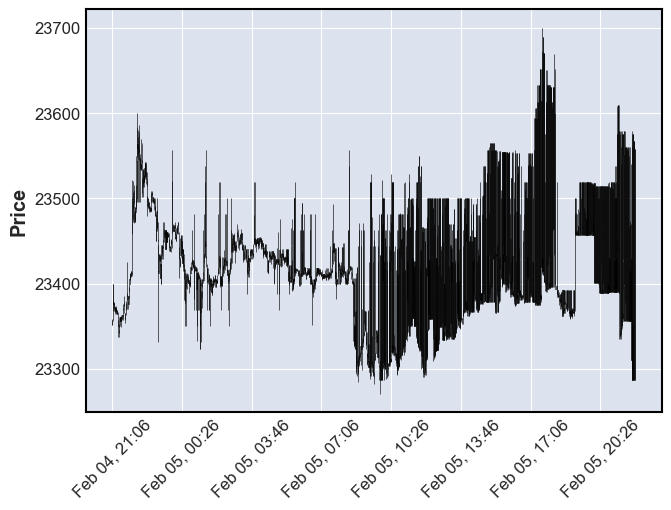

In [29]:
import mplfinance as mpf
fig = mpf.figure(figsize=(100, 7))
# data['startTime'] = data.startTime.apply(ms2dt)
data_time = data.set_index('startTime')
data_time.index.name = 'Date'
data_time.rename(columns = {'open':'Open', 'high':'High', 'low':'Low', 'close':'Close'})
mpf.plot(data_time[['open', 'high', 'low', 'close']], type='candle')

In [23]:
data

,stream,eventType,eventTime,startTime,closeTime,interval,open,high,low,close,volume
0,kline1m,kline,1675602354479,1675512360000,1675512419999,1m,23356.8,23356.8,23351.8,23356.0,31.692
1,kline1m,kline,1675602354479,1675512420000,1675512479999,1m,23356.0,23358.4,23351.8,23358.4,163.147
2,kline1m,kline,1675602354479,1675512480000,1675512539999,1m,23357.1,23400.0,23356.5,23367.4,107.088
3,kline1m,kline,1675602354479,1675512540000,1675512599999,1m,23370.7,23400.0,23367.4,23380.7,169.094
4,kline1m,kline,1675602354479,1675512600000,1675512659999,1m,23377.4,23380.7,23375.8,23375.8,37.944
...,...,...,...,...,...,...,...,...,...,...,...
1495,kline1m,kline,1675602354479,1675602060000,1675602119999,1m,23431.9,23567.4,23286.5,23286.6,117.894
1496,kline1m,kline,1675602354479,1675602120000,1675602179999,1m,23286.6,23567.4,23286.5,23296.5,83.399
1497,kline1m,kline,1675602354479,1675602180000,1675602239999,1m,23434.7,23567.4,23286.5,23567.4,148.006
1498,kline1m,kline,1675602354479,1675602240000,1675602299999,1m,23434.1,23557.4,23286.5,23557.4,97.397


In [33]:
import time
from datetime import datetime

In [39]:
datetime.today()

datetime.datetime(2023, 2, 5, 23, 58, 2, 631330)

In [47]:
now = datetime.now()
nowMin = now.year, now.month, now.day, now.hour, now.minute-1
dt2ms(*nowMin)

1675609080000

In [49]:
minute = 1500
min2ms = minute * 60000

In [51]:
dt2ms(*nowMin) - min2ms

1675519080000

In [53]:
print(dt2ms(*nowMin) - min2ms)
print(dt2ms(*nowMin))

1675519080000
1675609080000


In [54]:
now = datetime.now()
nowMin = now.year, now.month, now.day, now.hour, now.minute-1
endTime = dt2ms(*nowMin)
startTime = endTime - 1500*60*1000
a0 = um_futures_client.klines('btcusdt', '1m', startTime=startTime, endTime=endTime)
a1 = um_futures_client.klines('btcusdt', '1m', startTime=startTime-1500*60000, endTime=endTime-1500*60000)

In [68]:
a_0 = um_futures_client.klines('btcusdt', '1m', limit=1500)

In [72]:
pd.DataFrame(a_0)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1675519860000,23481.60,23481.60,23450.00,23460.40,130.697,1675519919999,3066988.97070,38,46.731,1096404.35370,0
1,1675519920000,23460.40,23464.60,23450.00,23464.50,153.049,1675519979999,3590150.56530,36,56.490,1325300.39470,0
2,1675519980000,23464.50,23484.90,23461.30,23473.10,159.267,1675520039999,3738137.01480,37,116.969,2745519.62980,0
3,1675520040000,23475.00,23500.00,23461.70,23468.00,116.935,1675520099999,2745727.56920,30,31.118,730810.52780,0
4,1675520100000,23464.70,23475.20,23464.70,23471.40,60.658,1675520159999,1423702.11330,25,3.445,80869.45030,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1675609560000,23199.70,23348.00,23199.10,23199.10,118.624,1675609619999,2762441.03030,74,71.291,1664332.79420,0
1496,1675609620000,23199.10,23342.00,23199.10,23199.30,74.427,1675609679999,1729752.09590,71,21.962,512573.56440,0
1497,1675609680000,23340.00,23342.00,23199.20,23200.00,88.037,1675609739999,2048255.30770,66,41.203,961727.34600,0
1498,1675609740000,23200.00,23342.00,23199.30,23199.30,126.649,1675609799999,2948008.48600,69,69.037,1611421.66440,0


In [60]:
import pandas as pd

In [61]:
a0df = pd.DataFrame(a0)
a1df = pd.DataFrame(a1)

In [79]:
start

1675519860000

pd.DataFrame(a_1)

In [75]:
1675519860000 + 1000*60*1000

1675579860000

In [64]:
start, end = 1675429380000, 1675459320000
print(ms2dt(start))
print(ms2dt(end))

2023-02-03 22:03:00
2023-02-04 06:22:00


In [65]:
print(ms2dt(1675429440000))

2023-02-03 22:04:00


In [80]:
now = datetime.now()
nowMin = now.year, now.month, now.day, now.hour, now.minute-1
endTime = dt2ms(*nowMin)

In [81]:
startTime = endTime - 1500*60*1000

In [82]:
startTimeList = [startTime]
endTimeList = [endTime]

for i in range(15):
    et = endTime - (i+1)*1500*60*1000
    st = startTime - (i+1)*1500*60*1000
    endTimeList.append(et)
    startTimeList.append(st)

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [9]:
a = np.array([[1, 2, 3]])
b = np.array([[4, 5, 6]])

In [10]:
(np.all(a < b)) and (3 < 4)

True